In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Загрузка данных
#### 1.1 Загрузка данных и изучение общей информации

In [2]:
try:
    geo_data_0 = pd.read_csv("/datasets/geo_data_0.csv")
    geo_data_1 = pd.read_csv("/datasets/geo_data_1.csv")
    geo_data_2 = pd.read_csv("/datasets/geo_data_2.csv")
except FileNotFoundError:
    geo_data_0 = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 3\Датасеты к проектам\МО в бизнесе\geo_data_0.csv")
    geo_data_1 = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 3\Датасеты к проектам\МО в бизнесе\geo_data_1.csv")
    geo_data_2 = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 3\Датасеты к проектам\МО в бизнесе\geo_data_2.csv")
    

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


#### 1.2 Поиск аномальных значений

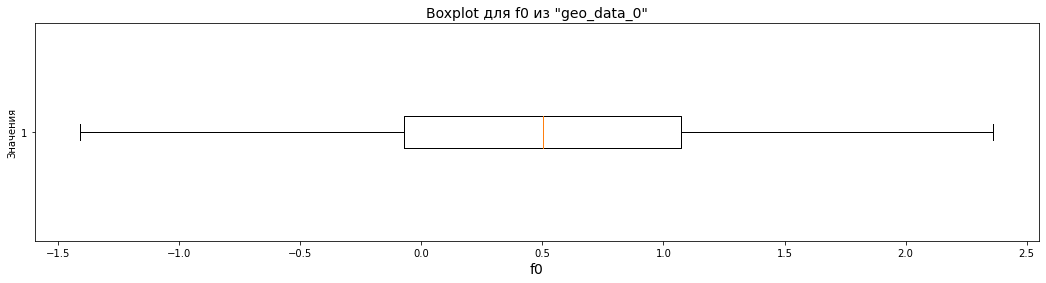

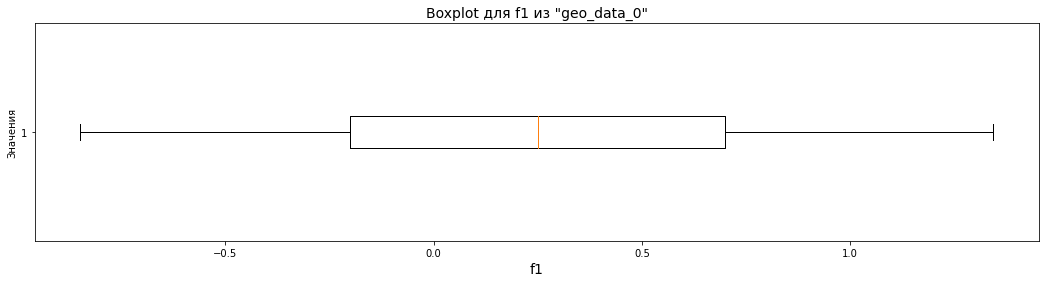

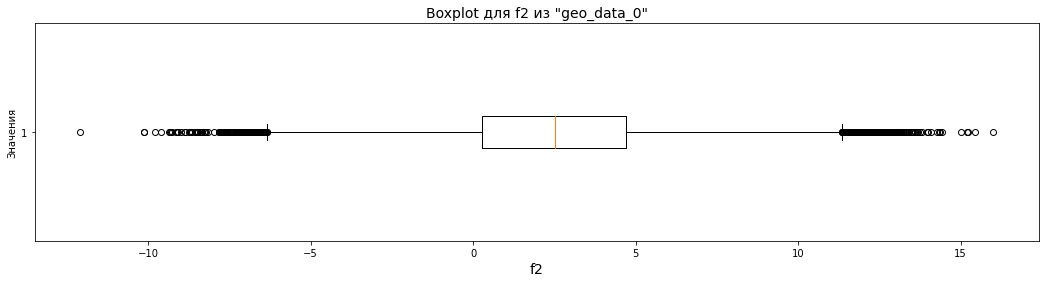

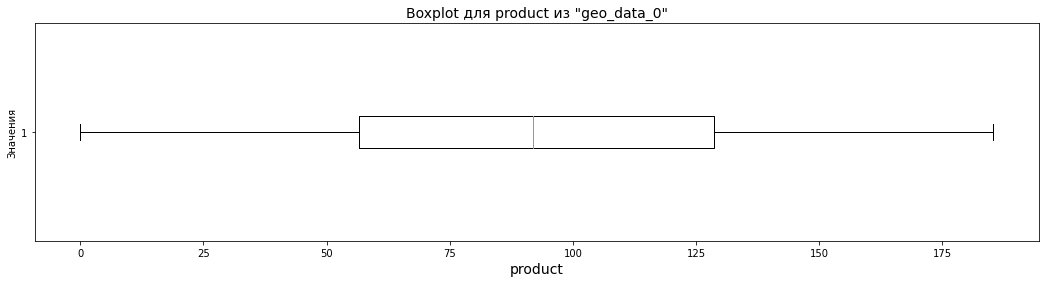

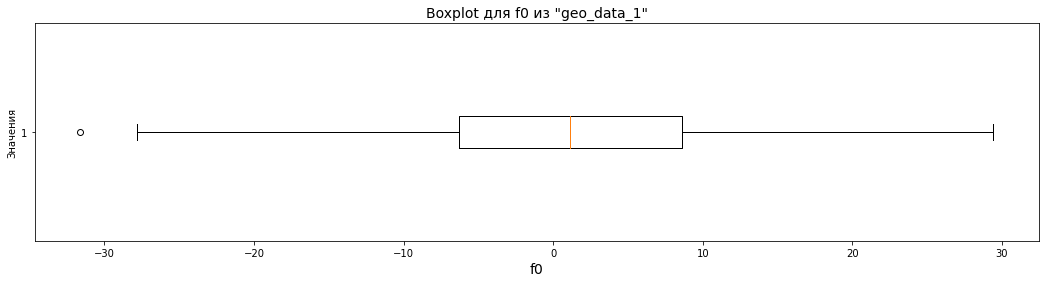

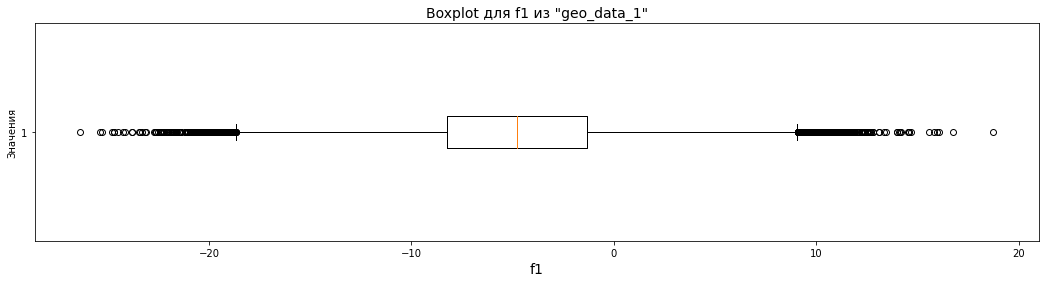

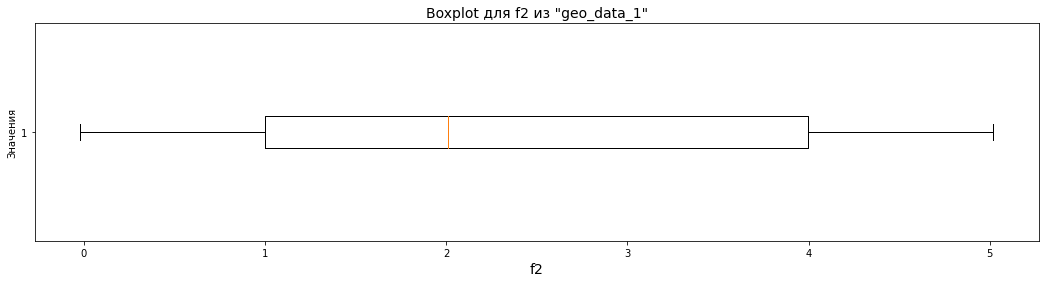

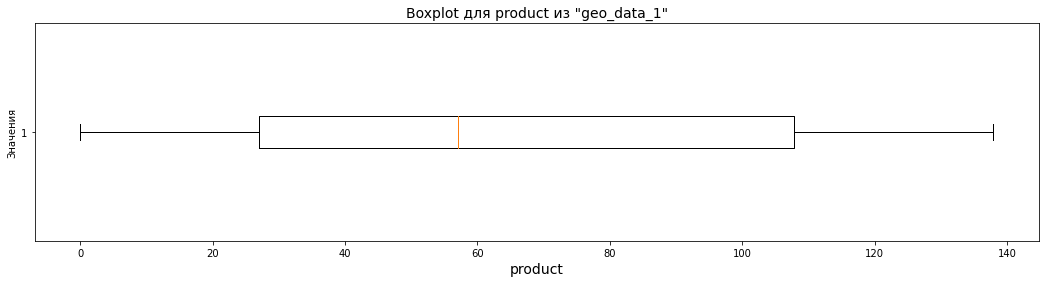

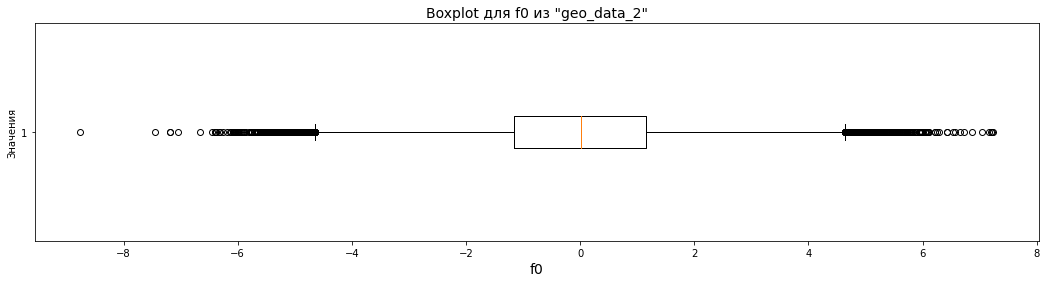

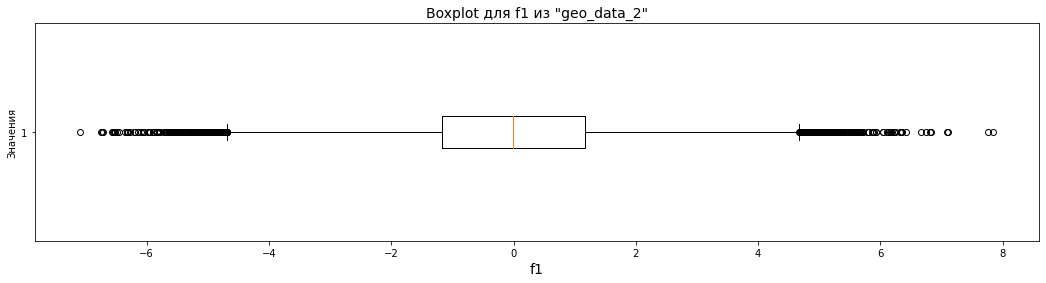

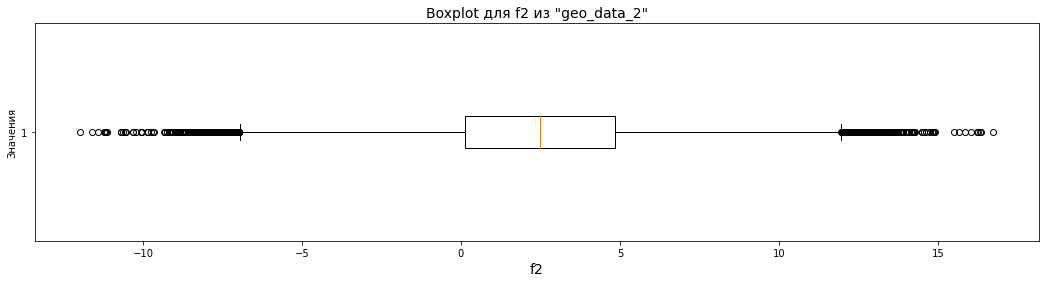

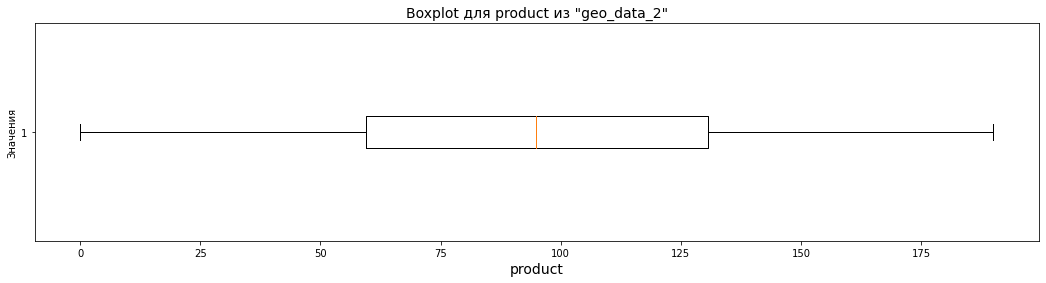

In [6]:
def plot_boxplot(dataframe, column, title, xlabel):
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.boxplot(dataframe[column], vert=False)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel('Значения')
    plt.show()

# Названия столбцов
columns1 = ["f0", "f1", "f2", "product"] 
columns2 = ["f0", "f1", "f2", "product"]    
columns3 = ["f0", "f1", "f2", "product"] 

# Вызываем функцию для каждого датафрейма и каждого столбца
for column in columns1:
    plot_boxplot(geo_data_0, column, f'Boxplot для {column} из "geo_data_0"', f'{column}')

for column in columns2:
    plot_boxplot(geo_data_1, column, f'Boxplot для {column} из "geo_data_1"', f'{column}')

for column in columns3:
    plot_boxplot(geo_data_2, column, f'Boxplot для {column} из "geo_data_2"', f'{column}')

> **После загрузки и изучения данных можно сделать несколько выводов:**
> 1. названия столбцов соответствуют стандартам python;
> 2. в датафреймах нет пропущенных значений;
> 3. тип данных во всех столбцах правильный;
> 4. в процессе поиска аномальных значений выяснилось, что в столбцах с количественными значениями есть выбросы, но умеренные.

## 2. Корреляционный анализ
#### 2.1 Построение матрицы корреляций

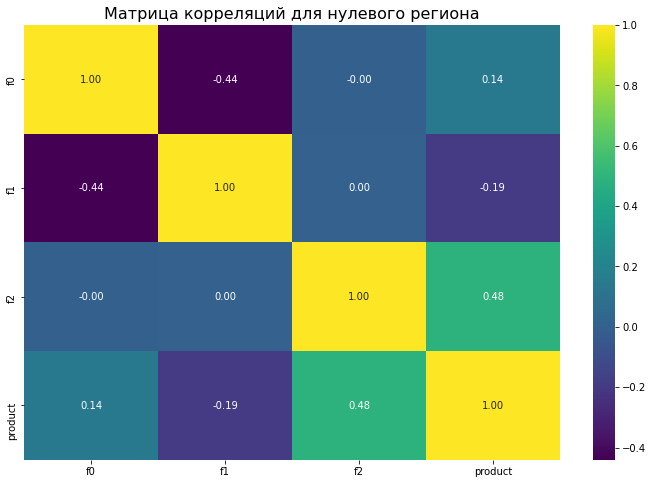

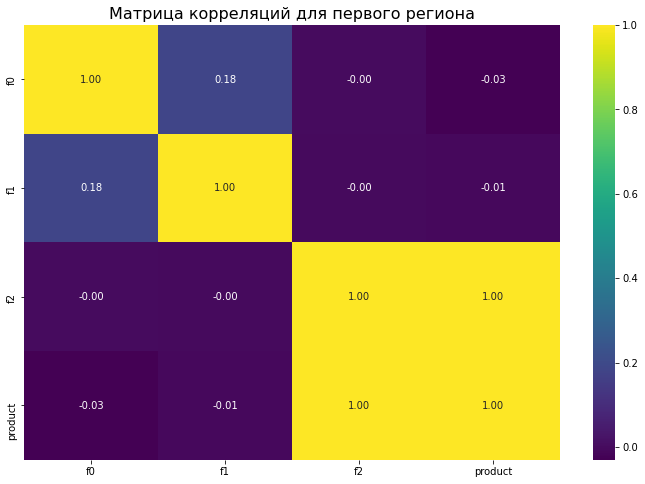

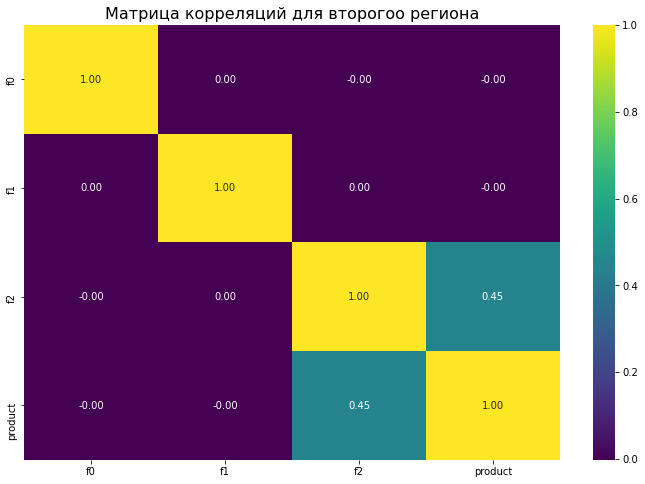

In [7]:
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='viridis')
    plt.title(title, fontsize=16)
    plt.show()

plot_correlation_matrix(geo_data_0, title="Матрица корреляций для нулевого региона")
plot_correlation_matrix(geo_data_1, title="Матрица корреляций для первого региона")
plot_correlation_matrix(geo_data_2, title="Матрица корреляций для второгоо региона")

> **После построения матрицы корреляций можно сделать несколько выводов:**
>
> **geo_data_0:**
>
> Признак f2 имеет положительную корреляцию с целевой переменной product (0.48), что может означать, что увеличение значения f2 связано с увеличением объема запасов нефти.
>
> **geo_data_1:**
>
> Признак f2 имеет сильную корреляцию с целевой переменной product (1.00), это означает, что увеличение значения f2 связано с увеличением объема запасов нефти.
>
> **geo_data_2:**
>
> Признак f2 имеет положительную корреляцию с целевой переменной product (0.45), что может означать, что увеличение значения f2 связано с увеличением объема запасов нефти.

## 3. Обучение моделей линейной регрессии для всех регионов

In [8]:
def train_and_evaluate_models(geo_data_list, TEST_SIZE=0.25, RANDOM_STATE=42):
    results = []

    for i, geo_data in enumerate(geo_data_list):
        X = geo_data.drop(columns=['product']).set_index('id') 
        y = geo_data['product']

        # Разбиение данных на обучающую и валидационную выборки
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

        # Обучение модели линейной регрессии
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Предсказания на валидационной выборке
        predictions = model.predict(X_valid)

        # Средний запас предсказанного сырья
        mean_predicted_product = predictions.mean()
        
        # RMSE модели
        rmse = mean_squared_error(y_valid, predictions, squared=False)

        # Создаем DataFrame с истинными и предсказанными значениями
        region_df = pd.DataFrame({
            'true': y_valid.values,
            'prediction': predictions
        })

        # Сохраняем DataFrame для данного региона вместе с дополнительной информацией
        results.append({
            'region': i,
            'mean_predicted_product': mean_predicted_product,
            'RMSE': rmse,
            'dataframe': region_df
        })

    return results

geo_data_list = [geo_data_0, geo_data_1, geo_data_2]
results_df = train_and_evaluate_models(geo_data_list)

# Выводим информацию о среднем запасе предсказанного сырья и RMSE для каждого региона
for result in results_df:
    print("Регион:", result['region'])
    print("Средний запас предсказанного сырья:", result['mean_predicted_product'])
    print("RMSE:", result['RMSE'])
    print()

# Доступ к данным для нулевого региона
region_0_data = results_df[0]
print("Предсказания нулового региона\n",region_0_data['dataframe'].head())
# Доступ к данным для первого региона
region_1_data = results_df[1]
print("Предсказания первого региона\n",region_1_data['dataframe'].head())
# Доступ к данным для второго региона
region_2_data = results_df[2]
print("Предсказания второго региона\n",region_2_data['dataframe'].head())


Регион: 0
Средний запас предсказанного сырья: 92.39879990657768
RMSE: 37.75660035026169

Регион: 1
Средний запас предсказанного сырья: 68.71287803913762
RMSE: 0.8902801001028854

Регион: 2
Средний запас предсказанного сырья: 94.77102387765939
RMSE: 40.145872311342174

Предсказания нулового региона
          true  prediction
0  122.073350  101.901017
1   48.738540   78.217774
2  131.338088  115.266901
3   88.327757  105.618618
4   36.959266   97.980185
Предсказания первого региона
          true  prediction
0    0.000000    0.844738
1   53.906522   52.921612
2  134.766305  135.110385
3  107.813044  109.494863
4    0.000000   -0.047292
Предсказания второго региона
          true  prediction
0  117.441301   98.301916
1   47.841249  101.592461
2   45.883483   52.449099
3  139.014608  109.922127
4   84.004276   72.411847


c:\Users\Тадевос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Тадевос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Тадевос\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


> **После обучения моделей можно сделать следующие выводы:**
>
> - Регион **geo_data_0:**
> Средний запас предсказанного сырья: 92.40 тыс. баррелей.
> RMSE модели: 37.76.
> - Регион **geo_data_1:**
> Средний запас предсказанного сырья: 68.71 тыс. баррелей.
> RMSE модели: 0.89.
> - Регион **geo_data_2:**
> Средний запас предсказанного сырья: 94.77 тыс. баррелей.
> RMSE модели: 40.15.
>
> Анализ результатов:
>
> **geo_data_0:** Средний запас предсказанного сырья довольно высок, но RMSE модели также значителен, что может указывать на большой разброс предсказаний относительно реальных значений. 
>
> **geo_data_1:** Низкий RMSE (0.89) и относительно неплохой средний запас предсказанного сырья (68.71 тыс. баррелей) говорят о хорошей точности модели в этом регионе. Это может быть потенциально перспективным регионом для бурения.
>
> **geo_data_2:** Средний запас предсказанного сырья высок (94.77 тыс. баррелей), но RMSE модели также значителен. Это может указывать на сложности в точном прогнозировании запасов сырья в данном регионе.
>
> Итог: Регион geo_data_1 выглядит наиболее перспективным из-за низкого значения RMSE и относительно хорошего среднего запаса предсказанного сырья.

## 4. Расчёт прибыли по выбранным скважинам и предсказаниям модели
#### 4.1 Подготовка значений для расчётов

In [9]:
# Бюджет на разработку скважин в регионе
BUDGET = 10_000_000_000

# Цена одного барреля сырья
PRICE_PER_BARREL = 450

# Доход с каждой единицы продукта
INCOME_PER_UNIT = 450_000

# Количество рандомно отбираемых скважин
NUMBER_OIL_WELL_DEVELOPMENT = 500

# Топ-200 скважин
NUMBER_BEST_OIL_WELLS = 200

# Стоимость одной скважины в тыс. рублей
WELL_COST = BUDGET / NUMBER_BEST_OIL_WELLS 

# Необходимый объем сырья для безубыточной разработки новой скважины
BREAK_EVEN_VOLUME = WELL_COST / INCOME_PER_UNIT
print("Достаточный объем сырья для безубыточной разработки новой скважины:", BREAK_EVEN_VOLUME)

Достаточный объем сырья для безубыточной разработки новой скважины: 111.11111111111111


> Достаточный объем сырья для безубыточной разработки новой скважины составляет около 111.11 тыс. баррелей.
> - Средний запас предсказанного сырья в регионе 0 составляет 92.40 тыс. баррелей, что ниже достаточного объема для безубыточной разработки.
> - Средний запас предсказанного сырья в регионе 1 составляет 68.71 тыс. баррелей, что также ниже достаточного объема для безубыточной разработки.
> - Средний запас предсказанного сырья в регионе 2 составляет 94.77 тыс. баррелей, что также ниже достаточного объема для безубыточной разработки.
>
> Исходя из этих данных, ни в одном из регионов средний запас предсказанного сырья не достигает уровня, необходимого для безубыточной разработки новой скважины. 

#### 4.2 Создание функции для расчёта прибыли

In [10]:
# Устанавливаем RANDOM_STATE
RANDOM_STATE = 42
state = RandomState(RANDOM_STATE)

def calculate_profit(df):
    best_oil_wells = df.sort_values(by='prediction', ascending=False)['true'].head(NUMBER_BEST_OIL_WELLS)
    total_profit = best_oil_wells.sum() * INCOME_PER_UNIT - BUDGET
    return total_profit.round()

# Создаем список для хранения прибыли для каждого региона
profits_per_region = []

# Перебираем каждый регион
for region_data in [region_0_data, region_1_data, region_2_data]:
    # Рассчитываем прибыль для текущего региона
    profit = calculate_profit(region_data['dataframe'])
    profits_per_region.append(profit)

# Выводим прибыль для каждого региона
for i, profit in enumerate(profits_per_region):
    print(f'Прибыль для региона {i}: {profit}')

Прибыль для региона 0: 3359141114.0
Прибыль для региона 1: 2415086697.0
Прибыль для региона 2: 2598571759.0


## 5. Расчёт рисков и средней прибыли для каждого региона
#### 5.1 Расчёт средней прибыли, рисков и 95% доверительного интервала

In [11]:
# Создаем список для хранения средней прибыли для каждого региона
average_profits = []

# Создаем список для хранения доверительных интервалов для каждого региона
confidence_intervals = []

# Создаем список для хранения риска убытков для каждого региона
risks = []

# Перебираем каждый регион
for region_data in [region_0_data, region_1_data, region_2_data]:
    profits = []
    
    # Генерируем 1000 бутстрепных выборок для текущего региона
    for i in range(1000):
        sample = region_data['dataframe'].sample(n=NUMBER_OIL_WELL_DEVELOPMENT, replace=True, random_state=state)
        profits.append(calculate_profit(sample))
    
    # Преобразуем список в массив NumPy для удобства работы
    profits = np.array(profits)
    
    # Средняя прибыль для текущего региона
    average_profit = profits.mean().astype(int)
    average_profits.append(average_profit)
    
    # Доверительный интервал для текущего региона
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)
    confidence_intervals.append((lower_bound, upper_bound))
    
    # Риск убытков для текущего региона
    risk_region = (profits < 0).mean()
    risks.append(risk_region)

# Выводим среднюю прибыль, доверительные интервалы и риск убытков для каждого региона
for i in range(len(average_profits)):
    print(f'Регион {i}:')
    print(f'Средняя прибыль = {average_profits[i]}')
    print(f'95%-й доверительный интервал: {confidence_intervals[i]}')
    print(f'Риск убытков = {risks[i]:.2%}')
    print()

Регион 0:
Средняя прибыль = 399575478
95%-й доверительный интервал: (-110467895.475, 897460328.0249999)
Риск убытков = 6.00%

Регион 1:
Средняя прибыль = 452576594
95%-й доверительный интервал: (52309409.50000001, 830146312.925)
Риск убытков = 0.90%

Регион 2:
Средняя прибыль = 378705903
95%-й доверительный интервал: (-127779434.675, 907923483.6749998)
Риск убытков = 7.50%



> **После проведённых рачётов можно сделать следующие выводы:**
>
> Исходя из предоставленных данных, наиболее предпочтительным регионом для разработки скважин является регион 1.
> 
> **Средняя прибыль:** Регион 1 имеет самую высокую среднюю прибыль среди всех регионов, составляющую 452,576,594 рублей. Это говорит о том, что в среднем в этом регионе можно ожидать наибольшей прибыли от добычи нефти.
>
> **95%-й доверительный интервал:** Доверительный интервал для региона 1 (от 52,309,409 до 830,146,312 рублей) относительно узкий по сравнению с другими регионами. Это означает, что мы более уверены в том, что средняя прибыль для этого региона находится в этом диапазоне.
>
> **Риск убытков:** Риск получить убытки в регионе 1 составляет всего 0.9%, что является самым низким риском среди всех регионов. Это говорит о том, что вероятность того, что разработка скважин в этом регионе приведет к убыткам, очень низкая.
>
> Исходя из этих данных, регион 1 является наиболее привлекательным вариантом для разработки скважин из представленных. Он обеспечивает высокую среднюю прибыль, имеет узкий доверительный интервал и низкий риск убытков.

## Общий вывод

В ходе исследования проекта по машинному обучению для компании компании «ГлавРосГосНефть» были выполнены следующие задачи:
 Загрузка данных: были загружены данные из трёх регионов и изучена общая информация о них. Выполнена проверка на наличие аномалий в данных. Корреляционный анализ: построена матрица корреляций, которая позволила оценить взаимосвязь между признаками. Было обнаружено, что качество нефти в разных регионах коррелирует с объёмом её запасов. Обучение моделей линейной регрессии для всех регионов: для каждого региона была построена модель линейной регрессии для предсказания объёма запасов нефти в новых скважинах. Расчёт прибыли по выбранным скважинам и предсказаниям модели: была написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели. Эта функция была применена ко всем регионам. Расчёт рисков и средней прибыли для каждого региона: была рассчитана средняя прибыль для каждого региона, определены 95%-е доверительные интервалы и риски убытков. Исходя из проведённых расчётов, был сделан вывод о предпочтительности разработки скважин в регионе 1. Данный регион обладает самой высокой средней прибылью, узким доверительным интервалом и низким риском убытков. Таким образом, на основании анализа данных и расчётов, предложено выбрать регион 1 для добычи нефти с целью максимизации прибыли компании "ГлавРосГосНефть".